In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/500_Person_Gender_Height_Weight_Index.csv")

In [ ]:
df.columns = ["Gender", "Height_m", "Weight_kg", "Index"]

In [ ]:
df.head()

,Gender,Height_m,Weight_kg,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
df.tail()

,Gender,Height_m,Weight_kg,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     500 non-null    object
 1   Height_m   500 non-null    int64 
 2   Weight_kg  500 non-null    int64 
 3   Index      500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(500, 4)

In [ ]:
df.isnull().sum()

,0
Gender,0
Height_m,0
Weight_kg,0
Index,0


In [ ]:
bmi_labels = {
    0: "Extremely Weak",
    1: "Weak",
    2: "Normal",
    3: "Overweight",
    4: "Obesity"
}

df = df[df["Index"].isin(bmi_labels)]
df["Category"] = df["Index"].map(bmi_labels)

/tmp/ipython-input-13-1340534993.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"] = df["Index"].map(bmi_labels)


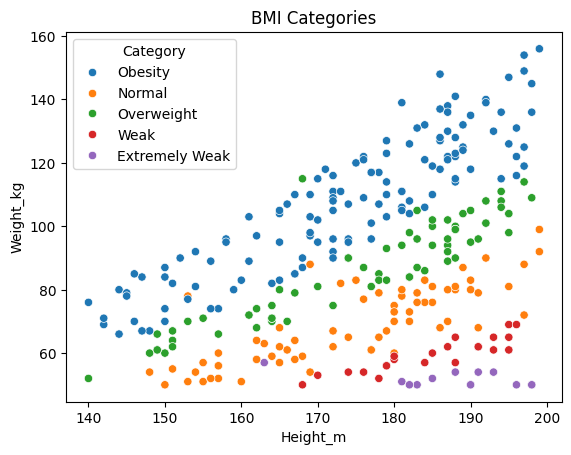

In [ ]:
sns.scatterplot(data=df, x="Height_m", y="Weight_kg", hue="Category")
plt.title("BMI Categories")
plt.show()

Count Plot

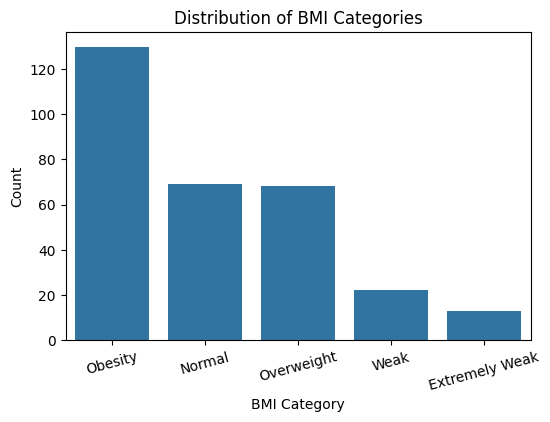

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Category")
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

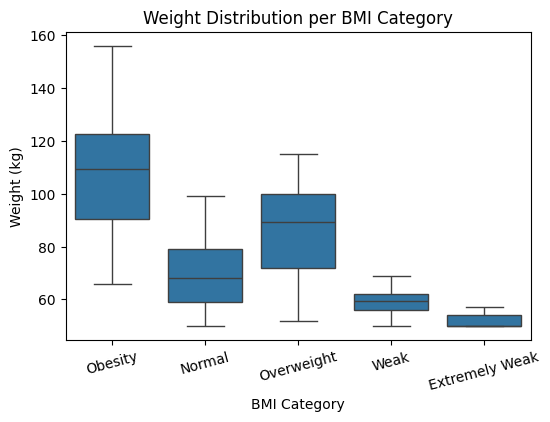

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Category", y="Weight_kg")
plt.title("Weight Distribution per BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Weight (kg)")
plt.xticks(rotation=15)
plt.show()

correlation

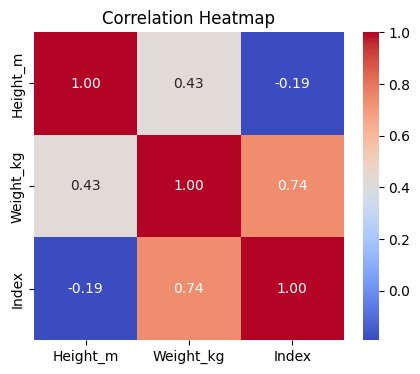

In [ ]:
corr = df[["Height_m", "Weight_kg", "Index"]].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df["Height_cm"] = df["Height_m"] * 100

In [ ]:
X = df[["Height_cm", "Weight_kg"]]
le = LabelEncoder()
y = le.fit_transform(df["Category"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Decision Tree**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8852459016393442
Classification Report:                 precision    recall  f1-score   support

Extremely Weak       0.80      1.00      0.89         4
        Normal       1.00      0.69      0.81        16
       Obesity       0.96      0.92      0.94        26
    Overweight       0.71      1.00      0.83        10
          Weak       0.83      1.00      0.91         5

      accuracy                           0.89        61
     macro avg       0.86      0.92      0.88        61
  weighted avg       0.91      0.89      0.88        61



In [ ]:
def predict_bmi_category(height_cm, weight_kg):
    bmi = weight_kg / ((height_cm / 100) ** 2)

    if bmi < 16:
        category = "Extremely Weak"
    elif bmi < 18.5:
        category = "Weak"
    elif bmi < 25:
        category = "Normal"
    elif bmi < 30:
        category = "Overweight"
    else:
        category = "Obesity"

    return f"BMI: {bmi:.2f}\nCategory: {category}"


In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=predict_bmi_category,
    inputs=[
        gr.Number(label="Height (cm)"),
        gr.Number(label="Weight (kg)")
    ],
    outputs="text",
    title="BMI Category Predictor",
    description="Predict your BMI category."
)

In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2c3db11ff5c7183ee6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
